In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │           286 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,356 (5.30 KB)

 Trainable params: 1,356 (5.30 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 15s 491ms/step - accuracy: 0.0234 - loss: 3.2847
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0387 - loss: 3.2715 - val_accuracy: 0.0494 - val_loss: 3.1829
Epoch 2/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0469 - loss: 3.2069
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0726 - loss: 3.1996 - val_accuracy: 0.1259 - val_loss: 3.0971
Epoch 3/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1172 - loss: 3.1461
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1134 - loss: 3.1133 - val_accuracy: 0.1760 - val_loss: 2.9665
Epoch 4/1000
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1016 - loss: 3.0216
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.kera

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9568 - loss: 0.3778


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[2.30358863e-13 0.00000000e+00 1.07788846e-13 2.90171667e-22
 3.37734613e-20 5.27796229e-34 2.02961952e-14 3.83129029e-10
 8.79332700e-25 2.13667251e-10 1.35692279e-03 3.41945666e-10
 5.08513252e-17 9.63737742e-17 5.58006764e-33 1.52056900e-23
 1.45220883e-18 1.34964450e-30 2.16805293e-36 3.70516525e-32
 3.61373512e-24 1.85995731e-24 9.98633683e-01 8.51674940e-06
 4.80340916e-24 7.84797521e-07]
22


# Confusion matrix

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


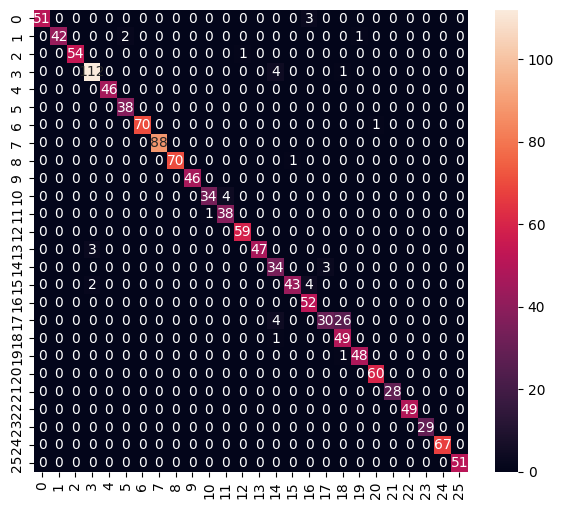

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       1.00      0.93      0.97        45
           2       1.00      0.98      0.99        55
           3       0.96      0.96      0.96       117
           4       1.00      1.00      1.00        46
           5       0.95      1.00      0.97        38
           6       1.00      0.99      0.99        71
           7       1.00      1.00      1.00        88
           8       1.00      0.99      0.99        71
           9       1.00      1.00      1.00        46
          10       0.97      0.89      0.93        38
          11       0.90      0.97      0.94        39
          12       0.98      1.00      0.99        59
          13       1.00      0.94      0.97        50
          14       0.79      0.92      0.85        37
          15       0.98      0.88      0.92        49
          16       0.88      1.00      0.94        52
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/cc/823_rgr94q9bcr879x982_6w0000gn/T/tmpon6l74jo/assets


INFO:tensorflow:Assets written to: /var/folders/cc/823_rgr94q9bcr879x982_6w0000gn/T/tmpon6l74jo/assets


Saved artifact at '/var/folders/cc/823_rgr94q9bcr879x982_6w0000gn/T/tmpon6l74jo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  14307185232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14307183696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14307185424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14307191184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14307184656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14307195792: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1734994283.442725 29734631 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1734994283.443044 29734631 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1734994283.446162 29734631 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


7524

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 337 μs, sys: 112 μs, total: 449 μs
Wall time: 397 μs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.3035889e-13 0.0000000e+00 1.0778865e-13 2.9017169e-22 3.3773465e-20
 5.2779233e-34 2.0296199e-14 3.8312906e-10 8.7932945e-25 2.1366767e-10
 1.3569241e-03 3.4194636e-10 5.0851332e-17 9.6373794e-17 5.5800258e-33
 1.5205635e-23 1.4522035e-18 1.3496345e-30 2.1680535e-36 3.7051664e-32
 3.6137221e-24 1.8599575e-24 9.9863368e-01 8.5167494e-06 4.8034103e-24
 7.8479837e-07]
22
